<a href="https://colab.research.google.com/github/Estibenjcp/Machine-Learning-BootCamp/blob/main/Titanic_DecisionTreeClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [346]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [347]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [348]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [349]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [350]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [351]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [352]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [353]:
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)


In [354]:
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)

In [355]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [356]:
train_df.drop(columns=['Cabin'], inplace=True)


In [357]:
train_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [358]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [359]:
test_df.drop(columns=['Cabin'], inplace=True)


In [360]:
test_df['Age'].fillna(test_df['Age'].median(), inplace=True)

In [361]:
test_df.isnull().sum()


PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

In [362]:
test_df['Fare'].fillna(test_df['Fare'].median(), inplace=True)

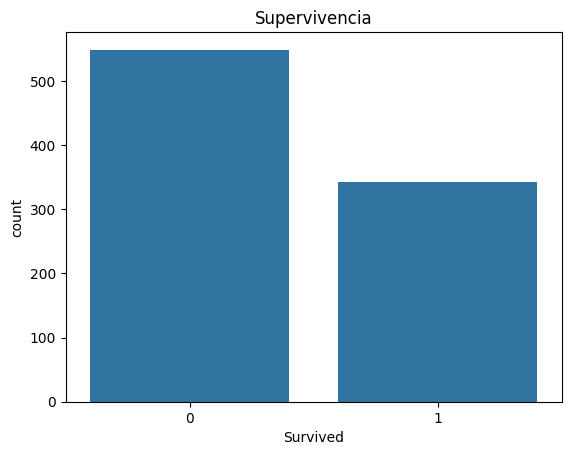

In [363]:
sns.countplot(x='Survived', data=train_df)
plt.title('Supervivencia')
plt.show()


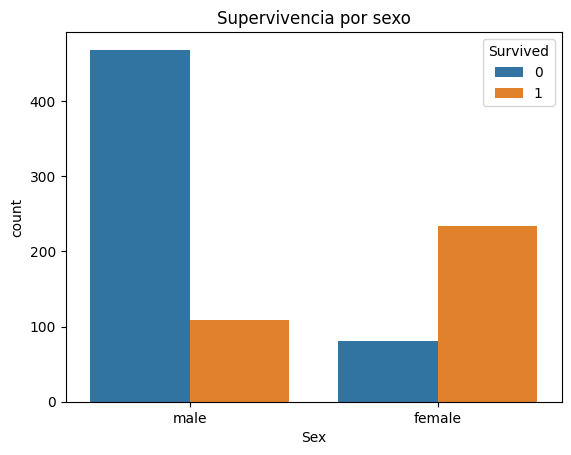

In [103]:
sns.countplot(x='Sex', hue='Survived', data=train_df)
plt.title('Supervivencia por sexo')
plt.show()

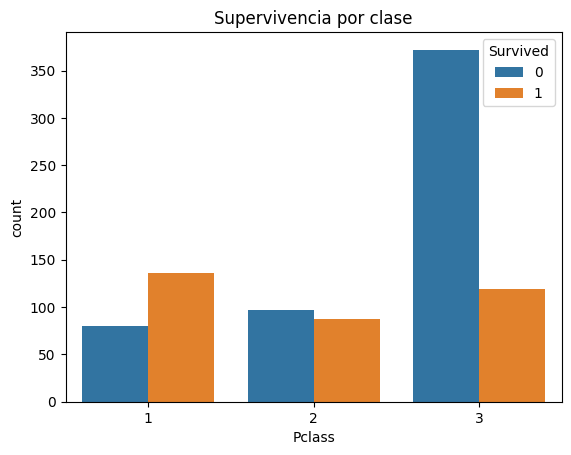

In [104]:
sns.countplot(x='Pclass', hue='Survived', data=train_df)
plt.title('Supervivencia por clase')
plt.show()

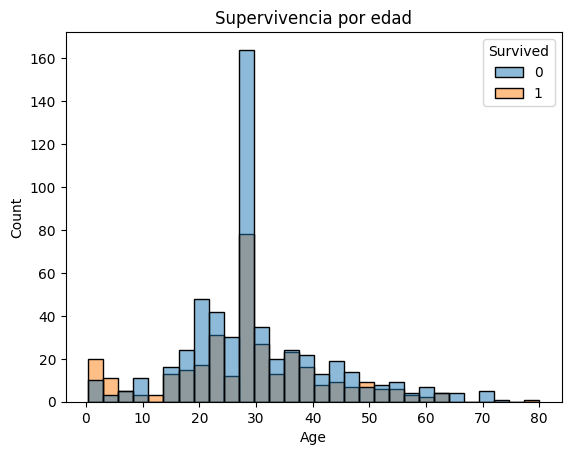

In [105]:
sns.histplot(x='Age', hue='Survived', data=train_df)
plt.title('Supervivencia por edad')
plt.show()

In [364]:
train_df.drop(columns = ['Name', 'Ticket'], inplace = True)

In [365]:
test_df.drop(columns = ['Name', 'Ticket'], inplace = True)

In [366]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [367]:
test_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S


In [368]:
label_encoder = LabelEncoder()


In [369]:
train_df[['Sex','Embarked']] = train_df[['Sex','Embarked']].apply(label_encoder.fit_transform)

In [370]:
test_df[['Sex', 'Embarked']] = test_df[['Sex', 'Embarked']].apply(label_encoder.fit_transform)


In [371]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2


In [372]:
test_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,1,34.5,0,0,7.8292,1
1,893,3,0,47.0,1,0,7.0000,2
2,894,2,1,62.0,0,0,9.6875,1
3,895,3,1,27.0,0,0,8.6625,2
4,896,3,0,22.0,1,1,12.2875,2


In [373]:
X = train_df.drop(columns=['Survived', 'PassengerId'])
y = train_df['Survived']


In [374]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [375]:
cls = DecisionTreeClassifier()

In [377]:
cls.fit(X_train, y_train)

DecisionTreeClassifier()

In [378]:
y_pred = cls.predict(X_test)

In [379]:
print(y_pred)

[0 0 1 1 0 1 1 0 0 1 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 1 0 1 1 1 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 0 1 0 0 0 1 1 1 1 1
 0 0 1 1 1 0 0 1 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 1
 0 1 1 0 0 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 0 1
 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 1 0 1 0 0 1 1 1 0 0 0 0 1 1 1 0 0 0 1 0
 1 0 0 0 1 0 0 0 0 1 1 1 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 1 0 0 1 1 1 1 0 0 1
 0 1 0 1 0 1 1 1 0 1 0 1 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0
 1 0 0 1 0 0 0 0 0]


In [395]:
y_test.shape

(268,)

In [380]:
accuracy = accuracy_score(y_test, y_pred)


In [381]:
print("Accuracy:", accuracy)

Accuracy: 0.75


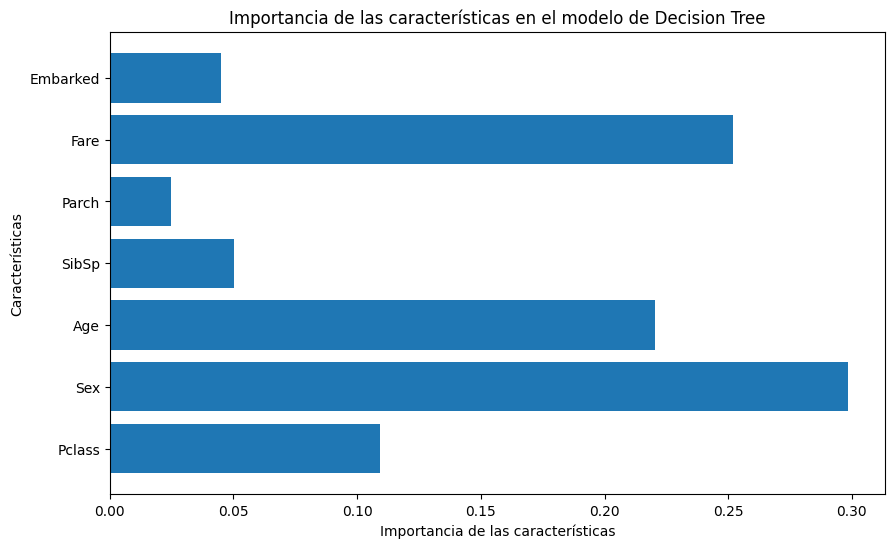

In [382]:
importances = cls.feature_importances_
feature_names = X.columns

plt.figure(figsize=(10, 6))
plt.barh(feature_names, importances)
plt.xlabel('Importancia de las características')
plt.ylabel('Características')
plt.title('Importancia de las características en el modelo de Decision Tree')
plt.show()

In [383]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.78      0.79       157
           1       0.70      0.70      0.70       111

    accuracy                           0.75       268
   macro avg       0.74      0.74      0.74       268
weighted avg       0.75      0.75      0.75       268



In [384]:
df_survived = pd.DataFrame({'Survived': y_pred})


In [385]:
df_passenger_id = test_df[['PassengerId']]


In [386]:
submission = pd.concat([df_passenger_id, df_survived], axis=1)


In [394]:
submission.to_csv('/submission.csv', index=False)


In [398]:
submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     268 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 6.7 KB
